# Linear Regression

이번에는 numpy를 활용하여 linear regression을 구현해볼 것입니다. 이번 노트북은 linear regression의 이론은 아주 간단하게만 소개하고 numpy를 어떻게 사용해서 linear regression을 구현하는지에 대해서 초점을 맞출 겁니다. 

Linear regression은 어떤 데이터 $x_i$를 어떤 값 $y_i$으로 매핑해주는 선형함수인데요, 우리는 linear regression에 데이터 $x_i$와 $y_i$를 주어서 linear regression으로 하여금 $x_i$와 $y_i$의 관계를 찾게 하면 됩니다. 이 과정이 linear regression의 학습 과정입니다. 학습은 데이터가 많을 수록 잘 되는 경향이 있습니다. 즉, $x_i$와 $y_i$쌍을 많이 확보해서 linear regression이 $x$, $y$사이의 관계를 잘 파악하게끔 해 줄 수 있습니다. 다만, linear regression은 $x$와 $y$ 사이의 선형적 관계만 파악할 수 있습니다.

$x_i, y_i$를 이용해서 linear regression이 학습되었다면, linear regression은 이제 $x_i$만 주어졌을 때, $y_i$를 예측한 값 $\hat{y_i}$를 계산할 수 있습니다.

Linear regression의 성능은 데이터 $x_i$에 대한 실제값 $y_i$과 linear regression이 예측한 값 $\hat{y_i}$의 차이가 얼마나 나는지로 평가합니다.
차이가 많이 나면 예측을 제대로 못했다는 의미이므로 성능이 좋지 않은 것이고, 차이가 적다면 예측을 잘 한다는 의미입니다.

## Import & Data Exploration

저희가 사용할 데이터는 간단한 집값 데이터를 사용해보도록 하겠습니다(공식 데이터가 아니고 그냥 임의로 생성한 겁니다).

In [1]:
# 이건 그냥 데이터셋 로드하기 위해서 만든 함수입니다.
from utils.data_generator import generate_simple_house_price_dataset

# 필요한 모듈 임포트
import numpy as np

# 시각화를 위한 모듈
import matplotlib.pyplot as plt

In [42]:
X, y = generate_simple_house_price_dataset()

이때, X는 집의 면적의 데이터를 담고 있고, y는 집 가격 데이터를 담고 있습니다. 어떻게 분포되어 있는지 한번 시각화를 해 보겠습니다.

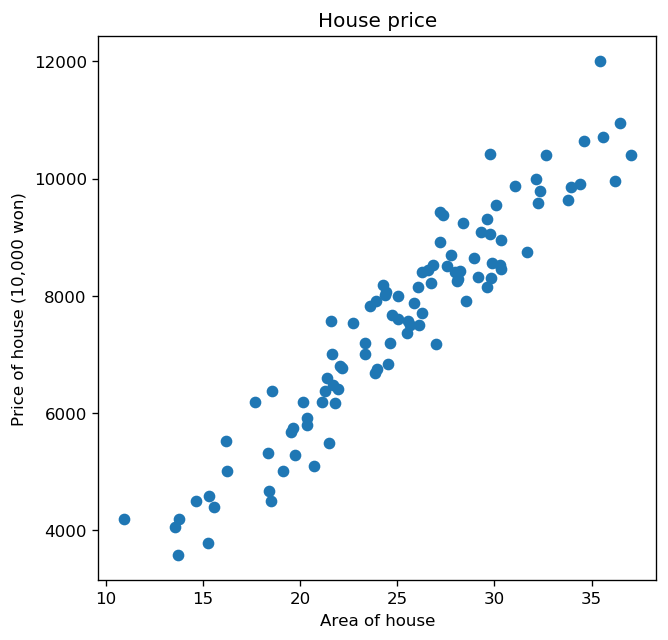

In [4]:
plt.figure(figsize=(6, 6), dpi=120)
plt.scatter(X, y)
plt.title("House price")
plt.xlabel("Area of house")
plt.ylabel("Price of house (10,000 won)")
plt.show()

저희는 이 데이터를 가지고 linear regression을 해 볼 것인데요, linear regression의 역할은 집의 면적과 가격간의 선형 관계를 파악하고, 집의 면적을 입력으로 받으면 집 가격을 예측하는 것입니다.

## Linear Regression Implementation

Linear regression의 학습은 위 데이터를 잘 설명할 수 있는 선형 함수를 찾는 것이라고 볼 수 있습니다. 위 그림의 점들을 최대한 잘 설명할 수 있는 선은 다음과 같이 될 수 있겠습니다.

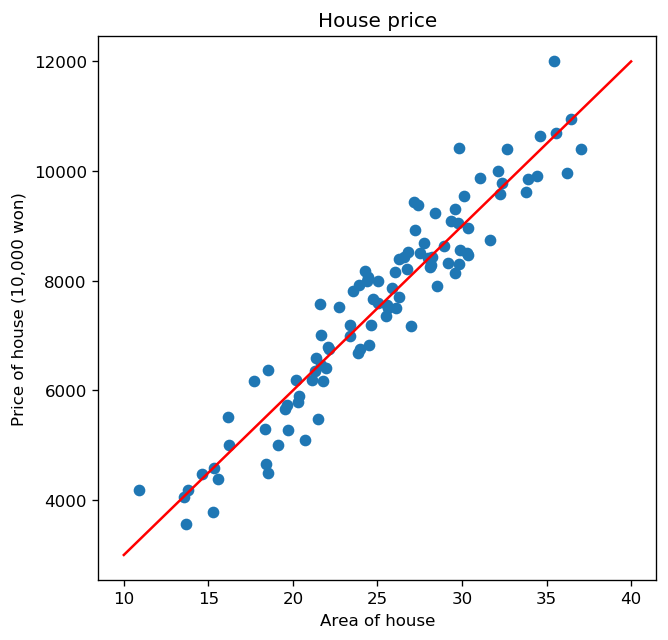

In [7]:
plt.figure(figsize=(6, 6), dpi=120)
plt.scatter(X, y)
plt.plot([10, 40], [10*300, 40*300], color="red")
plt.title("House price")
plt.xlabel("Area of house")
plt.ylabel("Price of house (10,000 won)")
plt.show()

지금 제가 정답을 알고 있기 때문에 저렇게 하드코딩으로(...) 선을 그릴 수 있지만, 실제로는 저 선을 모르는 상태에서 찾아야 하는 것입니다.
Linear regression이 그것을 수행해줍니다.

그럼, 저 선을 어떻게 찾아야 할까요? 일단 linear regression은 선형 함수입니다. 집 면적(X)과 집 가격(y)를 매핑해주는 함수이고, X가 입력, y가 출력입니다.
즉, 다음처럼 어떤 파라미터 $w, b$를 사용해서 표현할 수 있겠네요.

$$
y = w \cdot X + b
$$

이때, 우리는 $w, b$를 모릅니다. 이 두개를 알면 $X, y$간의 선형 관계식이 만들어지고, $X$를 바탕으로 $y$를 계산할 수 있습니다. Linear regression의 학습은 이 두개의 파라미터 $w,b$를 찾는 것입니다. 즉, linear regression의 학습이라는 것은 이 $w,b$를 찾는 과정입니다.

$w,b$를 찾는 과정은 여러가지가 있겠지만, ML(Maximum likelihood) estimation 방법으로 구현할 수 있습니다. 보통 머신러닝을 처음 접하실때, ML방법으로 line을 fitting(딱 맞는 line을 찾음)하므로, 저희도 그렇게 하도록 하겠습니다. 

ML추정법에 대한 자세한 이야기는 하지 않겠지만, ML로 추정하는 과정은 다음과 같습니다.

1. 파라미터를 임의의 수로 초기화한다.
2. 모델의 성능을 평가할 수 있는 cost 함수를 정의한다.
3. cost 함수를 최소화하는 방향으로 파라미터들을 업데이트한다.

이때, cost 함수를 최소화하는 방향은 cost함수를 미분해서 구할 수 있습니다. cost를 미분하게 되면 cost의 gradient를 알 수 있고, 그 gradient를 보고 cost가 감소하는 방향으로 파라미터들을 업데이트하면 되죠. 이 설명만으로는 linear regression을 이해하는 것은 불가능합니다. 따라서, 이론의 경우에는 다른 문서를 참조하심을 추천드리고, 저희는 numpy + tensorflow 라이브러리 튜토리얼이므로 머신러닝 이론에 대해서는 자세히 다루지 않습니다.

1. 저희는, $w,b$를 랜덤 수로 초기화할 것입니다.
2. cost 함수로는 mean squared error, 즉, 실제 집값과 예측 집값의 차이의 제곱의 평균을 이용할 것입니다.
   $$
   cost = \frac{1}{n}\sum_i (y_i - \hat{y_i})^2
   $$
   이때, n은 샘플 개수(100개)입니다.
3. cost 함수를 $w,b$에 대해 미분해서 gradient를 계산하고, w,b를 업데이트 해 줄 것입니다.
   미분한 값은 다음과 같습니다.
   $$
   \frac{\partial cost}{\partial w} = \frac{\partial cost}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w} = -\frac{2}{n}(y - \hat{y}) \cdot x
   $$
   $$
   \frac{\partial cost}{\partial b} = \frac{\partial cost}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b} = -\frac{2}{n} (y - \hat{y}) \cdot 1
   $$

## Training

이제, numpy를 이용해서 실제 코드를 구현해보도록 하겠습니다.

In [184]:
class LinearRegression():
    """
    Linear regression 클래스.
    집 면적을 입력으로 받아서 집 가격을 반환한다.
    """
    
    def __init__(self):
        """
        생성자
        w와 b를 정의하고 임의의 수로 초기화한다.
        """
        
        self.w = np.random.normal(loc=0, scale=1, size=(1, 1))
        self.b = np.random.normal(loc=0, scale=1, size=(1, 1))
        
    def predict(self, X):
        """
        집 면적 X를 받아서 집값 예측값 y_hat을 반환
        
        Arguments:
        - X: 집 면적 (100x1)
        
        Returns:
        - y_hat: 집 가격 예측값 (100x1)
        """
        
        # y_i = w * x_i + b 를 모든 i에 대해서 나타낸 식을 행렬 연산으로 표현한 것
        # [ y_1 ]   [ w * x_1 + b ]    [ x_1 ]
        # [ y_2 ] = [ w * x_2 + b ] =  [ x_2 ] * [ w ] + b
        # [ y_3 ]   [ w * x_3 + b ]    [ x_3 ]
        y_hat = np.matmul(X, self.w) + self.b
        
        return y_hat
    
    def fit(self, X, y, learning_rate=1e-3, epochs=10000):
        """
        line fitting (training) 메소드
        
        Arguments:
        - X: 집 면적
        - y: 실제 집 값
        - learning_rate: 학습의 속도를 튜닝해주는 상수, 작을수록 정교하고 느리게 학습,
                         클수록 빠르지만 부정확할 수 있고 학습 자체가 안될 수도 있음
        - epochs: 데이터셋을 몇 번 학습할 것인지
        
        Returns:
        - costs: 학습하면서 얻은 손실들
        """
        
        # 데이터 샘플 수
        n = X.shape[0]
        
        # (100,) -> (100, 1)
        y = y.reshape(n, -1)
        
        # 학습하면서 cost의 변화를 출력하기 위해서 cost들을 모두 저장해 둘 배열
        costs = []
        
        # 학습 시작
        for e in range(epochs):
            # prediction
            y_hat = self.predict(X)
            
            # 에러 계산 (출력용)
            cost = self.compute_cost(y_hat, y)

            # gradient 계산. 위의 gradient 식을 행렬 연산식으로 표현한 것
            # 위의 식을 풀어서 써보고, 이 행렬곱을 풀어서 써보면 이해가 될 겁니다.
            w_grad = -2/n * np.matmul(X.T, y - y_hat)
            b_grad = -2/n * np.sum(y - y_hat)

            # w, b 업데이트
            self.w -= learning_rate*w_grad
            self.b -= learning_rate*b_grad
            
            # 일정 루프마다 출력
            if e == 0 or (e+1)%1000 == 0:
                print(f"Epochs {e+1}/{epochs}, trainig cost: {cost:.8f}")
                
            costs.append(cost)
                
        return costs
        
    def compute_cost(self, y_hat, y):
        """
        예측값과 실제 값을 가지고 에러를 계산
        
        Arguments:
        - y_hat: 예측된 집 값
        - y: 실제 집 값
        
        Returns:
        - cost: 에러
        """
        
        cost = np.mean((y - y_hat)**2)
        return cost

Linear regression 객체를 생성합니다.

In [197]:
lr = LinearRegression()

학습하기 전에 데이터 범위를 조금 조정해주려고 합니다. 값들이 너무 커서 대충 0과 1사이로만 값들을 조정해주도록 하겠습니다.

In [198]:
X_train = (X - 10) / (40 - 10)
y_train = (y - 3000)/(12000 - 3000)

# 행렬계산 편의를 위해 차원을 (100,) -> (100, 1)로 바꿔줍니다.
X_train = X_train.reshape(100, 1)

print("조정 전 데이터 값 범위:")
print("X 최소: " + str(X.min()) + ", X 최대: " + str(X.max()))
print("y 최소: " + str(y.min()) + ", y 최대: " + str(y.max()))
print("조정 후 데이터 값 범위:")
print("X 최소: " + str(X_train.min()) + ", X 최대: " + str(X_train.max()))
print("y 최소: " + str(y_train.min()) + ", y 최대: " + str(y_train.max()))

print()
print("데이터 차원")
print(X_train.shape, y_train.shape)

조정 전 데이터 값 범위:
X 최소: 13.0073891883454, X 최대: 36.71666402440485
y 최소: 3889.0455471861123, y 최대: 10507.729151257587
조정 후 데이터 값 범위:
X 최소: 0.10024630627817999, X 최대: 0.8905554674801617
y 최소: 0.09878283857623471, y 최대: 0.8341921279175096

데이터 차원
(100, 1) (100,)


이제 학습을 시작합니다.

In [199]:
costs = lr.fit(X_train, y_train)

Epochs 1/10000, trainig cost: 3.40197340
Epochs 1000/10000, trainig cost: 0.02454638
Epochs 2000/10000, trainig cost: 0.00299769
Epochs 3000/10000, trainig cost: 0.00284935
Epochs 4000/10000, trainig cost: 0.00283778
Epochs 5000/10000, trainig cost: 0.00282798
Epochs 6000/10000, trainig cost: 0.00281904
Epochs 7000/10000, trainig cost: 0.00281086
Epochs 8000/10000, trainig cost: 0.00280338
Epochs 9000/10000, trainig cost: 0.00279655
Epochs 10000/10000, trainig cost: 0.00279030


이제 예측된 값과 실제 값을 시각화해볼 것인데요, 일단 주어진 집 면적으로 집 값을 예측합니다.

In [200]:
y_pred = lr.predict(X_train)

그런데, linear regression이 예측한 집 값은 0과 1사이로 스케일링 되어 있습니다. 아까 했던 연산을 그대로 거꾸로 해줍니다.

In [201]:
y_pred = y_pred*(12000 - 3000) + 3000

이제 시각화를 해보겠습니다.

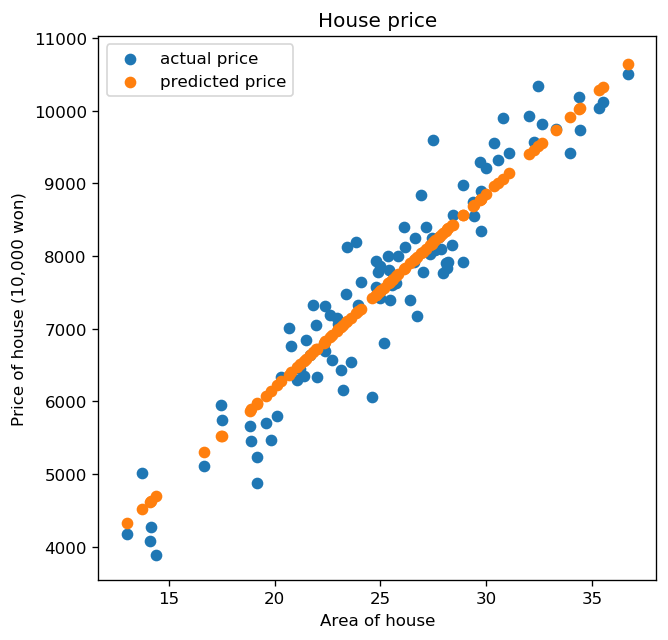

In [202]:
plt.figure(figsize=(6, 6), dpi=120)
plt.scatter(X, y, label="actual price")
plt.scatter(X, y_pred, label="predicted price")
plt.title("House price")
plt.xlabel("Area of house")
plt.ylabel("Price of house (10,000 won)")
plt.legend()
plt.show()

주황색 점들이 파란색 점들의 예측값으로, 파란색 점들의 추세를 어느정도 따라간다는 것을 알 수 있습니다.

그런데, 완전히 따라가지는 않는 모습인데요, 그것은, 이 모델이 linear regression 모델이기 때문입니다. Linear regression의 예측값은 반드시 어떤 선 위에 존재하게 됩니다.
이것을 해결하기 위해서 입력 feature값을 그대로 넣지 않고 약간의 변형을 가해서 넣어주는 방식이 있습니다.
이러한 것은 여기서 다루지는 않겠습니다.